## Homework 2: Wine Quality Prediction Using SGD
### Student Name: First Last
### Department:
### Course: CS504: Deep Learning/2019 Fall
### Due: 10/04/2019


Description: In this homework, you are going to implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.
2. Shuffle data (X and Y) at the beginning of each epoch. (10 points)
3. Decay learning rate at the end of each epoch. (10 points)
4. Choose the batch size in the powers of 2: 4, 8, 16, 32, ... (5 points)
5. Save the loss and weight of each epoch. (10 points)
6. Split the dataset into training (70%) and test (30%) sets. (5 points)
7. Print out the MSE and MAE of GD for both the training and test sets (using w_star). (15 points)
8. Print out the MSE and MAE of SGD for both the training and test sets (using w_star). (15 points)
9. Plot the loss curve for SGD. (10 points)
10. Plot the mse curves on the training and test sets over the weight sequence (w_hist). (20 points)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

FileNotFoundError: File b'winequality-white.csv' does not exist

In [ ]:
# Optimization: implement the minibatch Gradient Descent approach
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    batch_size: batch size
    epoch: number of max epoches
    
    return: w_star, loss_hist, w_hist
    '''
    
    m = len(Y)
    w = np.random.rand(X.shape[1] + 1, 1)
    loss_hist = np.zeros(epoch)
    w_hist = np.zeros((epoch, w.shape[0]))

    #Your code here:
    for i in range(epoch):
        #shuffle the data
        
        
        for b in range(int(m/batch_size)):
        
   

        w_hist[i,:] = w.T
        print(i, loss_hist[i])
        
    w_star = w  
    return w_star, loss_hist, w_hist

0 loss: 33314.4532084
1 loss: 2490.28353904
2 loss: 1880.12858519
3 loss: 1860.72737168
4 loss: 1853.1011913
5 loss: 1845.9250671
6 loss: 1838.96887576
7 loss: 1832.21971604
8 loss: 1825.66929515
9 loss: 1819.30975731


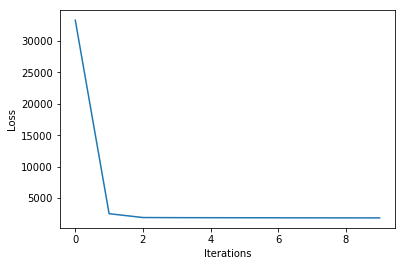

In [10]:
# example
w_star, loss_hist, w_hist = GD(X1, Y, lr = 0.0001, delta = 0.01, max_iter = 10)

# show the Loss curve
from matplotlib import pyplot as plt
plt.plot(range(10), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()